In [21]:
from qiskit import *

In [35]:
qr = QuantumRegister(8)
cr = ClassicalRegister(8)

circuit = QuantumCircuit(qr, cr)

#L
circuit.x([qr[7],qr[6],qr[5],qr[4]]) #for the negative controlled gates
circuit.barrier()
circuit.mct([qr[6],qr[5],qr[4],qr[3]], qr[7],None, mode='advanced')
circuit.mct([qr[5],qr[4],qr[2]], qr[6], None, mode='advanced')
circuit.ccx(qr[1], qr[4], qr[5])
circuit.cx(qr[0], qr[4])
circuit.barrier()
circuit.x([qr[7],qr[6],qr[5],qr[4]]) #for the negative controlled gates

circuit.barrier()

# multiple target negative controlled not
circuit.x(qr[4])
circuit.cx(qr[4], qr[5])
circuit.cx(qr[4], qr[6])
circuit.x(qr[4])

circuit.barrier()

# multi controlled Z rotation
circuit.h(qr[4])
circuit.mcrz(,[qr[6],qr[5],qr[4],qr[3]], qr[7])
circuit.h(qr[4])

circuit.barrier()

# multiple target negative controlled not
circuit.x(qr[4])
circuit.cx(qr[4], qr[5])
circuit.cx(qr[4], qr[6])
circuit.x(qr[4])

circuit.barrier()

# R
circuit.mct([qr[6],qr[5],qr[4],qr[3]], qr[7],None, mode='advanced')
circuit.mct([qr[5],qr[4],qr[2]], qr[6], None, mode='advanced')
circuit.ccx(qr[1], qr[4], qr[5])
circuit.cx(qr[0], qr[4])

circuit.barrier()

# swap operator
circuit.swap(qr[3], qr[7])
circuit.swap(qr[2], qr[6])
circuit.swap(qr[1], qr[5])
circuit.swap(qr[0], qr[4])


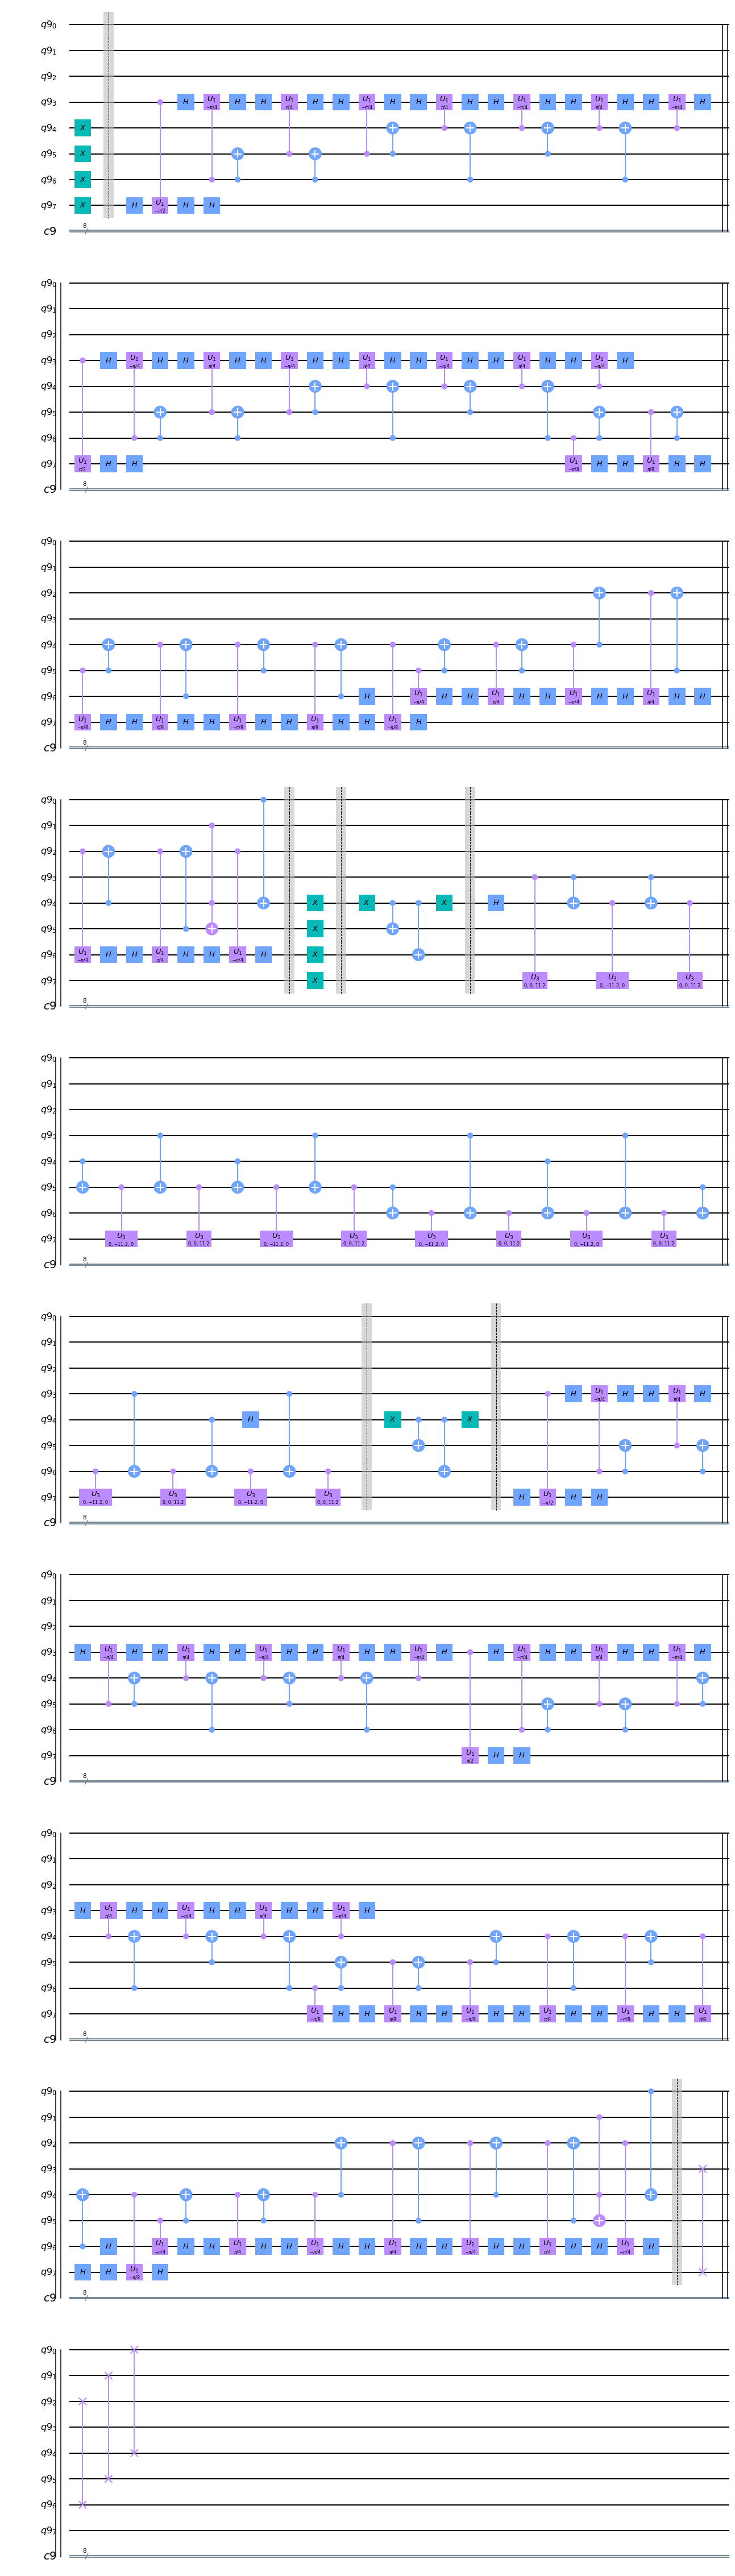

In [36]:
circuit.draw(output='mpl')

In [37]:
circuit.measure(qr[0:8], cr)

#simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

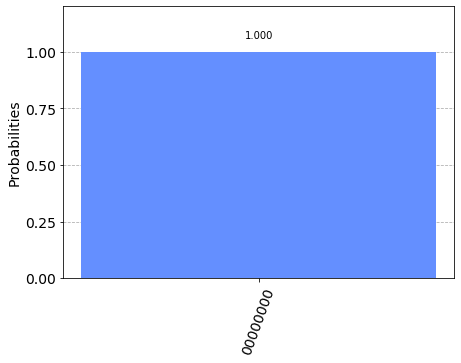

In [38]:
# show result
from qiskit.tools.visualization import plot_histogram, plot_circuit_layout
plot_histogram(result.get_counts(circuit))